# Приоритезация гипотез и анализ А/В-теста.

## Описание проекта.

Цель проекта: увеличение выручки интернет-магазина.
Задачи:
1.Приоритезация гипотез для увеличения выручки.
2.Запуск A/B-теста и анализ результатов.

Источники данных:
Таблица с гипотезами по увеличению выручки интенет-магазина и параметрами: Reach, Impact, Confidence, Effort.
Таблица с данными о заказах, включавющая информацию о доходах, дате и делении на группы.
Таблица с данными о количестве посетителей на каждый день по группам.

Структура проекта:
Структура проекта:
1. [Изучение данных.](#start)
2. [Предобработка данных.](#data_preparation)
3. [Приоритезация гипотез.](#hypothesis)
4. [Анализ А/В-теста](#test_analysis)
5. [Вывод по результатам теста.](#outcome)

## Изучение данных.<a id="start"></a>

In [44]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt

In [45]:
hypothesis = pd.read_csv('C:/datasets/hypothesis.csv')
orders = pd.read_csv('C:/datasets/orders.csv')
visitors = pd.read_csv('C:/datasets/visitors.csv')

In [46]:
hypothesis.info()
pd.options.display.max_colwidth = 130
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [47]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [48]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


## Предобработка данных.<a id="data_preparation"></a>

### Приводим даты к нужному типу

In [49]:

orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%dT%H:%M:%S')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%dT%H:%M:%S')
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### Проверяем данные на нулевые значения

In [50]:
display(orders.isna().sum())
display(visitors.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

### Проверяем orders и visitors на наличие дубликатов

In [51]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

### Унифицируем названия колонок в таблицах

In [52]:
#В таблице hypothesis напишем названия колонок со строчных букв
hypothesis = hypothesis.rename(columns = {'Hypothesis': 'hypothesis', 'Reach': 'reach', 'Impact': 'impact', 'Confidence': 'confidence', 'Efforts': 'efforts'})

In [53]:
#Убираем прописные буквы из назаний колонок в orders
orders = orders.rename(columns = {'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'})

### Проверяем корректность проведения теста.

'Количество групп в тесте:'

2

'Дата начала теста:'

Timestamp('2019-08-01 00:00:00')

'Дата окончания теста:'

Timestamp('2019-08-31 00:00:00')

'Количество пользователей в группе А:'

557

'Количество пользователей в группе В:'

640

'Число посетителей, относящихся к обеим группам:'

0

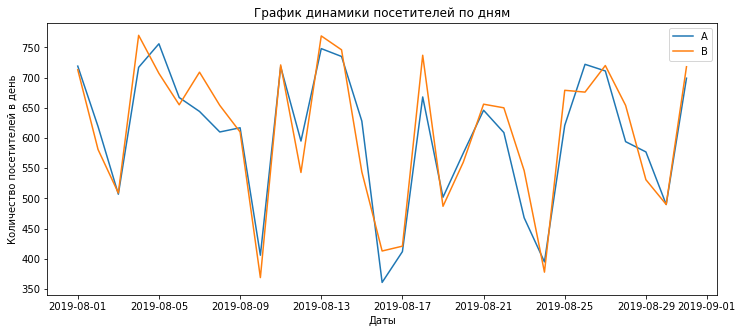

In [54]:
#Проверяем количество групп в А/В-тесте
display('Количество групп в тесте:',orders['group'].nunique())

#Выясняем временной интервал теста:
display('Дата начала теста:', visitors['date'].min())
display('Дата окончания теста:',visitors['date'].max())

#Выявляем количество пользователей в каждой группе:
users_number_A = orders[orders['group'] == 'A']['visitor_id'].count()
users_number_B = orders[orders['group'] == 'B']['visitor_id'].count()
display('Количество пользователей в группе А:', users_number_A)
display('Количество пользователей в группе В:', users_number_B)

#Проверяем, не попадают ли какие-то пользователи в обе группы:
duplicate_visitors = orders.query('group == "A" and group == "B"').count()
display("Число посетителей, относящихся к обеим группам:", duplicate_visitors['visitor_id'])

#Изучаем динамику посетителей по группам по дням:
#Находим динамику посетителей по дням:
visitors_by_date_A = visitors[visitors['group'] == 'A'].groupby(['date'])['visitors'].sum()
visitors_by_date_B = visitors[visitors['group'] == 'B'].groupby(['date'])['visitors'].sum()
#Строим график посетителей по дням
fig = plt.figure(figsize = (12, 5))

plt.plot(visitors_by_date_A, label = 'A')
plt.plot(visitors_by_date_B, label = 'B')

plt.xlabel('Даты')
plt.ylabel('Количество посетителей в день')
plt.title('График динамики посетителей по дням')

plt.legend()
plt.show()

В тесте участвуют две группы пользователей. Ни один из них не попадает в обе группы одновременно. Тест длился 31 день, с 1 по 31 августа 2019 г.
Посетители распределены по группам неравномерно: 557/640, это может создать погрешности в его результатах.
Динамика обеих групп посетителей по дням почти идентична, следовательно группы ведут себя одинаково, аномалий в поведении посетителей нет. Это хорошо. Результат теста будет более точным.

## Приоритезация гипотез.<a id="hypothesis"></a>

### Приоритезируем гипотизы с использованием вреймворка ICE

In [55]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['ICE', 'hypothesis']].sort_values(by = 'ICE', ascending = False).round(2))

,ICE,hypothesis
8,16.20,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.33,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.20,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.00,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.00,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.00,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.33,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.12,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.00,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


### Приоритезируем гипотизы с использованием вреймворка RICE

In [56]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['RICE', 'hypothesis']].sort_values(by = 'RICE', ascending = False))

,RICE,hypothesis
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


Фреймворк ICE не учитывает параметр охвата пользователей предполагаемым изменением. Поэтому, при добавлении нового параметра, меняяются и результаты приоритезации. При использовании RICE на первых местах оказались гипотезы, связанные воздействием напрямую, через Сеть, со стимулированием клиентов к действию. При использовании ICE в верху списка оказались маркетинговые действия, в том числе - с коротким сроком действия.

## Анализ А/В-теста.<a id="test_analysis"></a>

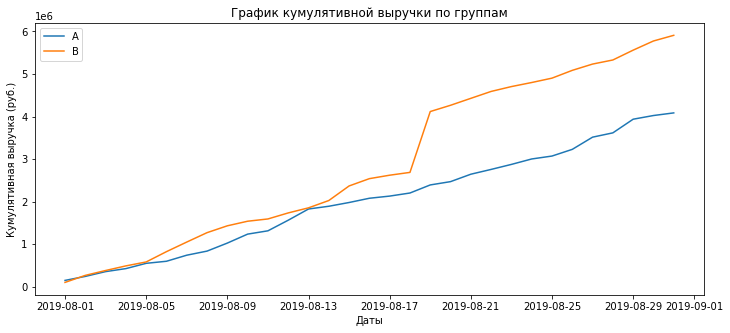

In [57]:
#Для построения графиков кумулятивной выручки и кумулятивного среднего чека по группам создаём таблицы с кумулятивными данными.
#создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()

#получаем агрегированные кумулятивные по дням данные о заказах 
aggregated_orders = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#получаем агрегированные кумулятивные по дням данные о посетителях
aggregated_visitors = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                         .agg({'date' : 'max', 'group' : 'max', 'visitors': 'sum'}), axis = 1).sort_values(by = ['date', 'group'])

#объединяем кумулятивные данные в одной таблице
cumulative_data = aggregated_orders.merge(aggregated_visitors, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#создаем график с кумулятивной выручкой для каждой группы:
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

#строим график кумулятивной выручки по группам:
fig = plt.figure(figsize = (12, 5))

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label = 'A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label = 'B')
plt.xlabel('Даты')
plt.ylabel('Кумулятивная выручка (руб.)')
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.show()
#cumulative_data

Кумулятивная выручка группы В растёт быстрее. В середине эксперимента в группе В происходит резкий скачок кумулятивной выручки, после чего рост снова становится плавным. Очевидно мы имеем дело с разовой аномалией. Или было очень много заказов или же были очень дорогие заказы. Данные необходимо проверить на предмет выбросов.

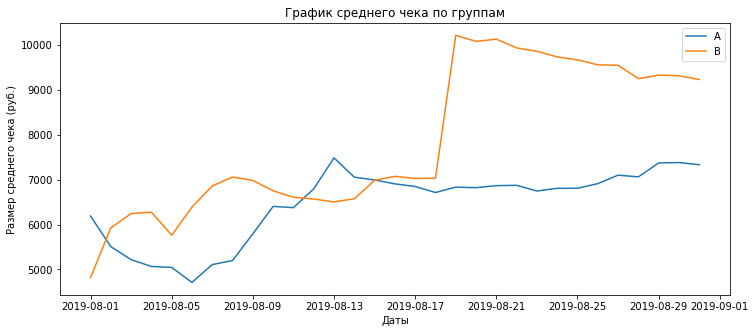

In [58]:
#строим графики среднего чека по группам
fig = plt.figure(figsize = (12, 5))

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] / cumulative_revenue_A['orders'], label = 'A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] / cumulative_revenue_B['orders'], label = 'B')

plt.xlabel('Даты')
plt.ylabel('Размер среднего чека (руб.)')
plt.title('График среднего чека по группам')

plt.legend()
plt.show()

Средний чек у группы В в середине теста резко вырос более, чем в полтора раза, затем начал постепенно снижаться. Мы явно имеем дело с аномалией. Судя по графику, показатели для обеих груп стабилизировались, но аномальные данные нужно убрать.

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101
5,2019-08-06,598401,127,824337,129
6,2019-08-07,740818,145,1049671,153
7,2019-08-08,837097,161,1270589,180
8,2019-08-09,1025603,177,1431401,205
9,2019-08-10,1236098,193,1539203,228


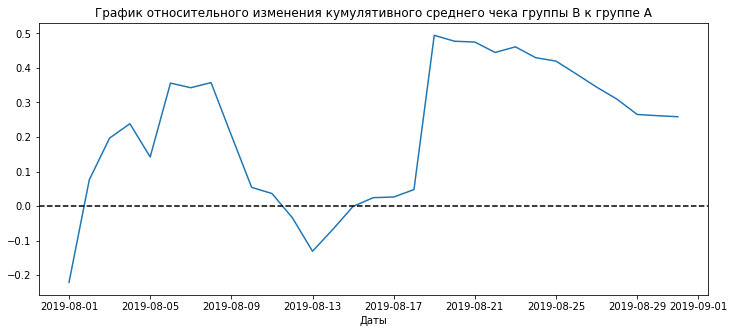

In [59]:
#Cобираем данные о выручке в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

display(merged_cumulative_revenue)

# Строим график относительного изменения кумулятивного среднего чека группы B к группе A
fig = plt.figure(figsize = (12, 5))

plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB']) / (merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA']) - 1)
plt.axhline(y = 0, color = 'black', linestyle = '--')

plt.xlabel('Даты')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')


plt.show()

В начале теста относительное значение кумулятивного среднего чека группы В относительно группы А было ниже более чем на 20%. Затем произошло два резких скачка, в результате которых относительное значение среднего чека группы В стало почти на 40% выше, по отношению к группе А. Позже это значение резко упало и в середине теста вновь очень резко возросло. Ближе к концу теста началось его снижение и стабилизация на уровне около 30% выше по отношению к группе Б. Такие серьёзные колебания свидетельствуют об аномалиях, влияние которых только начало уменьшаться ближе к концу периода. Без фильтрации данных от аномалий тест пришлось бы продолжать.

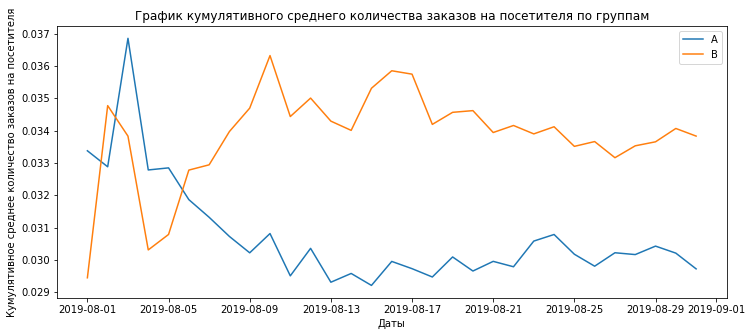

In [60]:
#Создаём таблицы кумулятивного среднего количества заказов:
cumulative_data['orders_by_visitors'] = cumulative_data['orders'] / cumulative_data['visitors']

#Создаём таблицы кумулятивного среднего количества заказов по группам:
cumulative_orders_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_orders_data_B = cumulative_data[cumulative_data['group'] == 'B']

#Cтроим график кумулятивного среднего количества заказов на посетителя по группам
fig = plt.figure(figsize = (12, 5))

plt.plot(cumulative_orders_data_A['date'], cumulative_orders_data_A['orders_by_visitors'], label = 'A')
plt.plot(cumulative_orders_data_B['date'], cumulative_orders_data_B['orders_by_visitors'], label = 'B')

plt.xlabel('Даты')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

plt.legend()
plt.show()

В обеих группах уже в начале теста произошёл скачок количества заказов, после чего их количество резко снизилось. Затем количество заказов на посетителя в группе А начало стабилизироваться. В группе В произошло ещё два скачка в середине теста, после чего так же началась стабилизация этого показателя. В группе В этот показатель остаётся более высоким, но незначительно. Возможно, стоит проверить статистическую значимость этого различия.

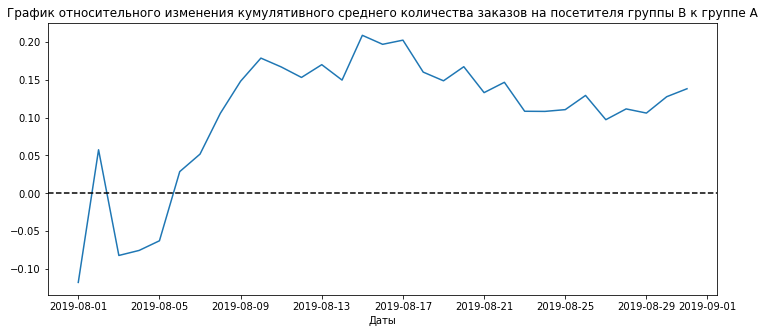

In [61]:
#Объединяем кумулятивные данные
merged_cumulative_data = cumulative_orders_data_A.merge(cumulative_orders_data_B, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

#Строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
fig = plt.figure(figsize = (12, 5))

plt.plot(merged_cumulative_data['date'], (merged_cumulative_data['orders_by_visitorsB'] / merged_cumulative_data['orders_by_visitorsA']) - 1)
plt.axhline(y = 0, color = 'black', linestyle = '--')

plt.xlabel('Даты')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.show()

В начале теста относительное изменение среднего количества заказов на посетителя группы В к группе А скачет. Во второй половине теста показатель начинает стабилизироваться. Очевидно, в группе А были посетители с аномальным количеством заказов. Затем, подобная же аномалия проявилась в группе В.

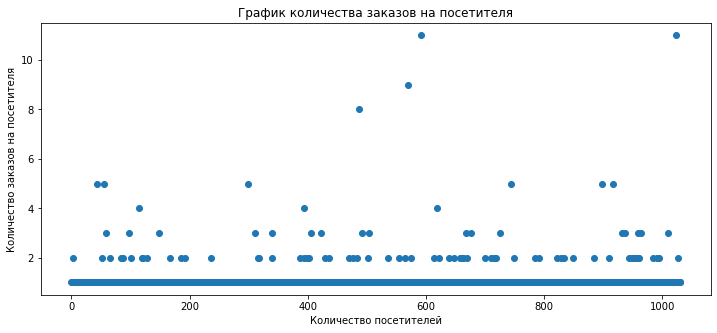

In [62]:
#Группируем количество заказов по пользователям.
orders_by_visitors = orders.groupby('visitor_id', as_index = False).agg({'transaction_id' : 'nunique'})
orders_by_visitors.columns = ['visitor_id', 'orders']
#Строим точечный график количества заказов по пользователям.
x_values = pd.Series(range(0, len(orders_by_visitors)))

fig = plt.figure(figsize = (12, 5))
plt.scatter(x_values, orders_by_visitors['orders'])

plt.xlabel('Количество посетителей')
plt.ylabel('Количество заказов на посетителя')
plt.title('График количества заказов на посетителя')

plt.show()

Основная масса посетителей сделала за весь период по одному заказу. Довольно большое количество из них совершило по два заказа, очевидно нет причины считать их аномалией. Считать ли аномалией посетителей, совершивших три заказа, - не ясно.

In [63]:
#Считаем 95-й и 99-й перцентили количества заказов на пользователя, чтобы выбрать границу для определения аномальных пользователей
display(np.percentile(orders_by_visitors['orders'], [95, 99]))

array([2., 4.])

Не более 5% посетителей оформляли 2 заказа. Примем это число за верхнюю границу числа заказов, остальное отнесём к аномалиям.

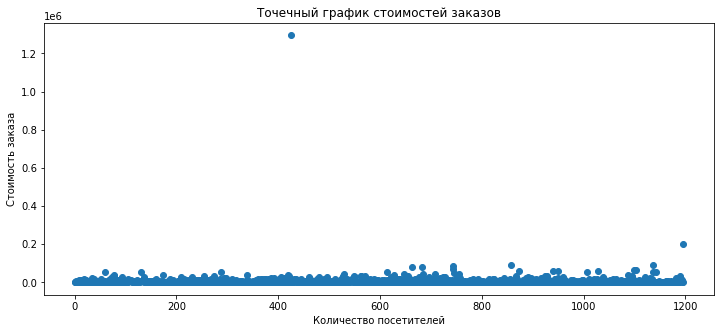

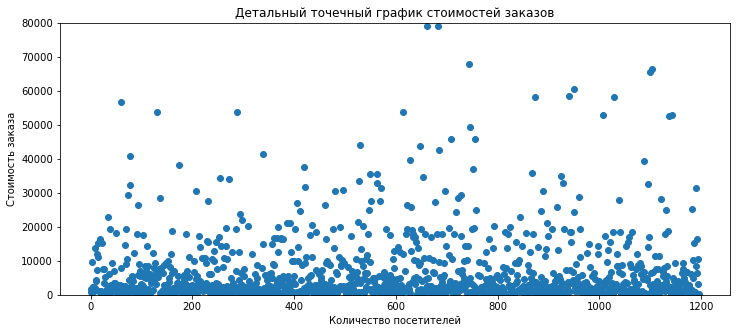

In [64]:
#Строим точечный график стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))

fig = plt.figure(figsize = (12, 5))
plt.scatter(x_values, orders['revenue'])

plt.xlabel('Количество посетителей')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимостей заказов')

plt.show()
#Строим точечный график стоимостей заказов с ограничением по оси У для изучение основной части заказа
x_values = pd.Series(range(0, len(orders['revenue'])))

fig = plt.figure(figsize = (12, 5))
plt.scatter(x_values, orders['revenue'])
plt.ylim((0,80000))

plt.xlabel('Количество посетителей')
plt.ylabel('Стоимость заказа')
plt.title('Детальный точечный график стоимостей заказов')

plt.show()

Стоимость основной массы заказов до 20-ти тысяч.

In [65]:
#Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов
display(np.percentile(orders['revenue'], [95, 99]))
display(orders['revenue'].mean())
display(orders['revenue'].median())

array([28000. , 58233.2])

8348.005847953216

2978.0

Не более 1% посетителей оформляли заказ на сумму более 58233.2 рубля. Примем это число за верхнюю границу стоимости заказов, остальное отнесём к аномалиям. Сравнение среднего и медианного показателя свидететельствуют о существенном влиянии выброса.

Делаем тест в отношении среднего числа заказов между группами по "сырым" данным:

Нулевая гипотеза: Статистические различия в среднем числе заказов между группами отсутствуют.
Альтернативная гипотеза: В среднем числе заказов между группами присутствуют статистически значимые различия.
Поскольку мы используем при расчётах 99-ю перцентиль, alpha = 0.01

In [66]:
#Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
#Создаём таблицы заказов по пользователям, для каждой группы:
orders_by_visitors_A = (orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
)
orders_by_visitors_A.columns = ['visitor_id', 'orders']
orders_by_visitors_B = (orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
)
orders_by_visitors_B.columns = ['visitor_id', 'orders']

#Создаём таблицы с количеством посетителей на дату по группам:
visitors_A = visitors[visitors['group'] == 'A']
visitors_B = visitors[visitors['group'] == 'B']
#На основе таблиц создаём выборки для теста:
sample_A = pd.concat([orders_by_visitors_A['orders'], pd.Series(0, index = np.arange(visitors_A['visitors'].sum() - len(orders_by_visitors_A['orders'])), name = 'orders')], axis = 0)
sample_B = pd.concat([orders_by_visitors_B['orders'], pd.Series(0, index = np.arange(visitors_B['visitors'].sum() - len(orders_by_visitors_B['orders'])), name = 'orders')], axis = 0)

display('p-value =' , "{0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))

display('Разница в среднем количестве заказов равна', "{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

'p-value ='

'0.017'

'Разница в среднем количестве заказов равна'

'0.138'

Тест показал, что p-value больше чем 0.01, следовательно нулевую гипотезу об отсутствии статистически значимых различий в среднем числе заказов между группами отвергнуть на основании "сырых" данных не удалось. По "сырым" данным количество заказов на пользователя по группам отличается.
Относительный прирост в группе В составляет почти 14%. Наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

Делаем тест в отношении среднего чека заказа между группами по "сырым" данным:

Нулевая гипотеза: Статистические различия в среднем чеке заказа между группами отсутствуют.
Альтернативная гипотеза: В среднем чеке заказа между группами присутствуют статистически значимые различия.
Поскольку мы используем при расчётах 99-ю перцентиль, alpha = 0.01

Нулевая гипотеза: Статистические различия в среднем чеке заказа между группами отсутствуют.
Альтернативная гипотеза: В среднем чеке заказа между группами присутствуют статистически значимые различия.
Поскольку мы используем при расчётах 99-ю перцентиль, alpha = 0.01

In [67]:
#Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
display('p-value =' , '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))
display('Разница в среднем количестве заказов равна', '{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

'p-value ='

'0.729'

'Разница в среднем количестве заказов равна'

'0.259'

Тест показал, что p-value значительно больше чем 0.01, следовательно нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергнуть не удалось.
При этом средний чек группы В значительно выше среднего чека группы А.
Поскольку относительное различие среднего чека между сегментами составляет 25.9%, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

In [68]:
#Для подсчёта статистической значимости различий в среднем количестве заказов на посетителя между группами и статистической
#значимости различий в среднем чеке заказа между группами по «очищенным» данным создадим переменную,
#содержащую данные об аномальных пользователях
#Создаём переменную со слишком большим количеством заказов:
users_with_many_orders = pd.concat([orders_by_visitors_A[orders_by_visitors_A['orders'] > 4]['visitor_id'], orders_by_visitors_B[orders_by_visitors_B['orders'] > 4]['visitor_id']], axis = 0)

#Создаём переменную со слишком большим чеком:
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']

#Собираем данные об аномальных пользователях:
abnormal_users = (pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values())

In [69]:
#Создаём переменные с очищенными данными о среднем количестве заказов
sample_filtered_A = pd.concat([orders_by_visitors_A[np.logical_not(orders_by_visitors_A['visitor_id'].isin(abnormal_users))]['orders'],
                              pd.Series(0, index = np.arange(visitors_A['visitors'].sum() - len(orders_by_visitors_A['orders'])), name = 'orders')], axis = 0)

sample_filtered_B = pd.concat([orders_by_visitors_B[np.logical_not(orders_by_visitors_B['visitor_id'].isin(abnormal_users))]['orders'],
                              pd.Series(0, index = np.arange(visitors_B['visitors'].sum() - len(orders_by_visitors_B['orders'])), name = 'orders')], axis = 0)


In [70]:
#Cчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
display('p-value =' , "{0:.3f}".format(stats.mannwhitneyu(sample_filtered_A, sample_filtered_B)[1]))

display('Разница в среднем количестве заказов равна', "{0:.3f}".format(sample_filtered_B.mean() / sample_filtered_A.mean() - 1))

'p-value ='

'0.014'

'Разница в среднем количестве заказов равна'

'0.153'

По очищенным данным статистическая значимость различий в среднем количестве заказов на посетителя между группами подтверждается. p-value теперь равно значению alpha, следовательно, мы отклоняем нулевую гипотезу. Относительный прирост в группе В стал ещё более заметным и составил 17.4% (по неочищенным данным - 13.8%)

In [71]:
#Для вычисления статистической значимости различий в среднем чеке заказа между группами по очищенным данным
#создаём переменные с очищенными данными о среднем чеке заказа:
sample_filtered_avg_A = orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']
sample_filtered_avg_B = orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']

In [72]:
#Cчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным
display('p-value =' , "{0:.3f}".format(stats.mannwhitneyu(sample_filtered_avg_A, sample_filtered_avg_B)[1]))
display('Разница в среднем количестве заказов равна', "{0:.3f}".format(sample_filtered_avg_B.mean() / sample_filtered_avg_A.mean() - 1))

'p-value ='

'0.851'

'Разница в среднем количестве заказов равна'

'-0.006'

p-value для очищенных данных не просто остался значительно больше чем 0.05, но и увеличился. Средний чек группы В по очищенным данным на 2% меньше, чем у группы А. Различие в среднем чеке заказа статистической значимости не имеет.

## Вывод по результатам теста.

Относительно приоритезации гипотез: 
При помощи фреймворка ICE в качестве приоритетных выделяются:
1. Запустить акцию, дающую скидку на товар в день рождения - 16.20
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - 13.33
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - 11.20

При помощи фреймворка RICE в качестве приоритетных выделяются:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - 112.0
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа - 56.0
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - 40.0
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию -40.0 

Фреймворк ICE не учитывает параметр охвата пользователей предполагаемым изменением. Поэтому, при добавлении нового параметра, меняяются и результаты приоритезации. При использовании RICE на первых местах оказались гипотезы, связанные воздействием напрямую, через Сеть, со стимулированием клиентов к действию. При использовании ICE в верху списка оказались маркетинговые действия, в том числе - с коротким сроком действия.

По анализу результатов А/В-теста:

1. Статистически значимых различий в количестве заказов по группам и по "сырым" данным нет. Однако после фильтрации аномалий статистически значимые различия по этому параметру появляются.
2. Статистически значимых различий по среднему чеку нет ни по "сырым", ни по очищенным данным. До удаления аномалий средний чек в группе В был значительно выше, чем в группе А (на 25.9%). После очистки данных средний чек в группе В оказался на 0.6% ниже, чем группе А.
3. Графики показывают стабилизацию параметров к концу теста.
Тест можно остановить и зафиксировать "победу" группы В, поскольку снижение чека на 0.6%, не имеющее статистической значимости, вполне компенсируется ростом количества заказов на 15.3%